Binomial Logistic Regression

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [51]:
X,y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LogisticRegression(max_iter = 100000 ,random_state=0)
clf.fit(X_train, y_train)
acc = accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy: {acc}")

Accuracy: 0.9824561403508771


Multinomial Logistic Regressionm

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

digits = datasets.load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = linear_model.LogisticRegression(max_iter = 100000, random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.97


https://realpython.com/logistic-regression-python/
Logistic Regression in Python With scikit-learn : Example 1 

In [54]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [55]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [56]:
model = LogisticRegression(solver = 'liblinear', random_state=0)
model.fit(x,y)


LogisticRegression(random_state=0, solver='liblinear')

In [57]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

https://github.com/SSaishruthi/LogisticRegression_Vectorized_Implementation/blob/master/Logistic_Regression.ipynb

In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [59]:
df = pd.read_csv('./data/iris-data.csv')
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
df = df.dropna(subset = ['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [63]:
df['class'].value_counts()

class
Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='Count'>

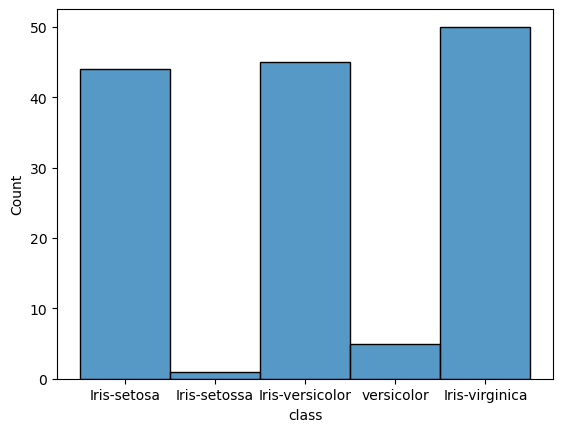

In [64]:
sns.histplot(df['class'])

<Axes: xlabel='class', ylabel='petal_width_cm'>

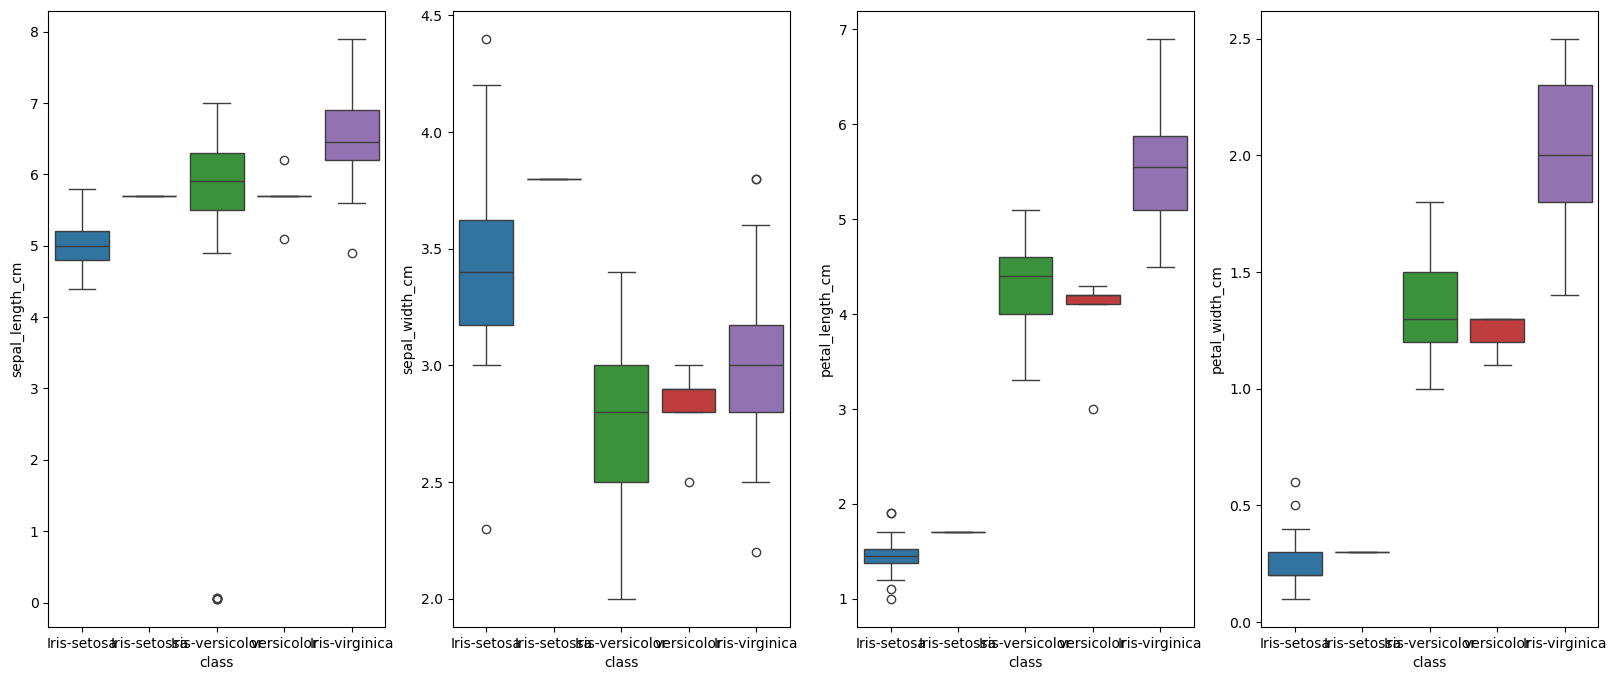

In [69]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
sns.boxplot(x = 'class', y = 'sepal_length_cm', data = df, hue = 'class')
plt.subplot(1,4,2)
sns.boxplot(x = 'class', y = 'sepal_width_cm', data = df, hue = 'class')
plt.subplot(1,4,3)
sns.boxplot(x = 'class', y = 'petal_length_cm', data = df, hue = 'class')
plt.subplot(1,4,4)
sns.boxplot(x = 'class', y = 'petal_width_cm', data = df, hue = 'class')


/home/soumya/miniconda3/envs/ml_pclub_roadmap/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


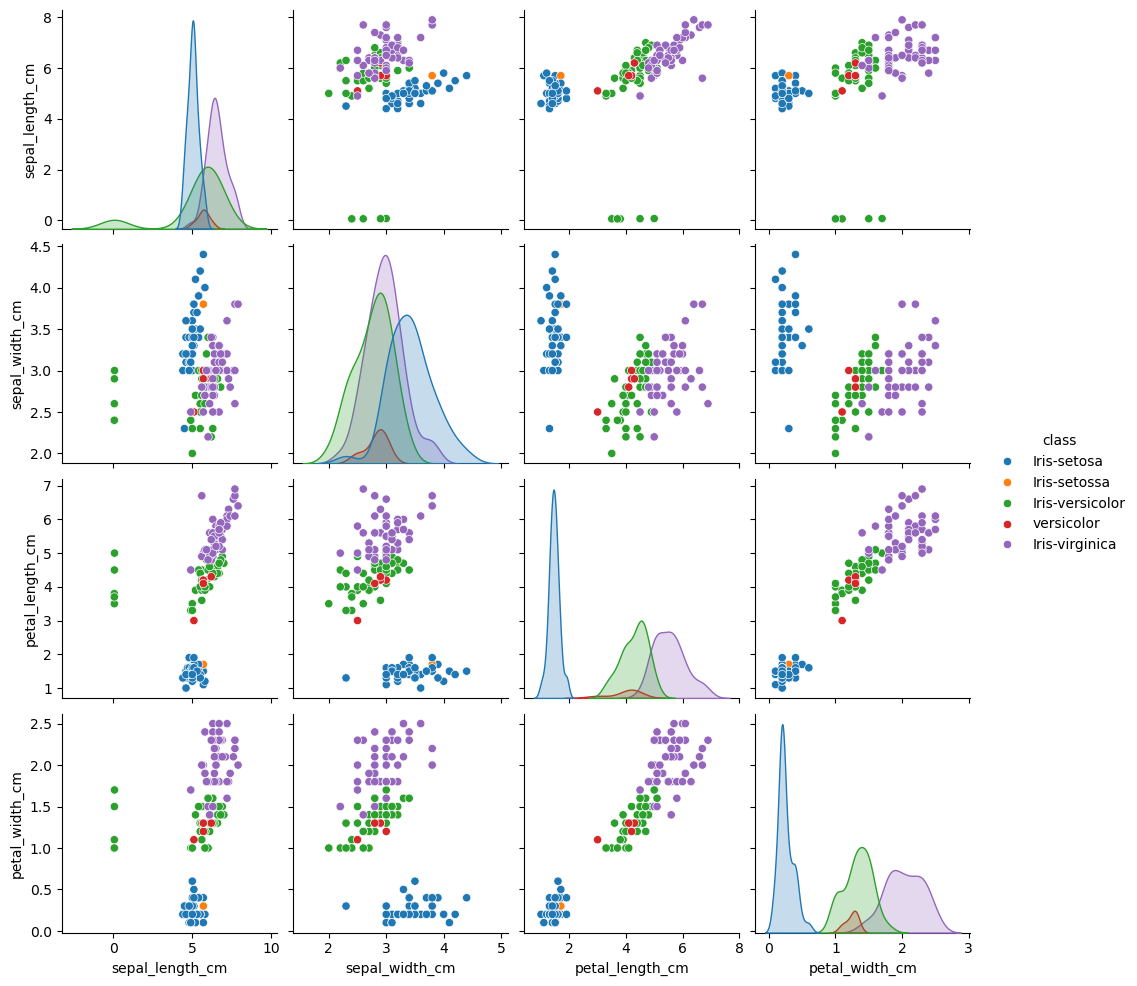

In [70]:
sns.pairplot(df, hue = 'class', size = 2.5)

In [71]:
df['class'] = df['class'].replace(['Iris-setossa','versicolor'], ['Iris-setosa','Iris-versicolor'])
df['class'].value_counts()

class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='petal_width_cm'>

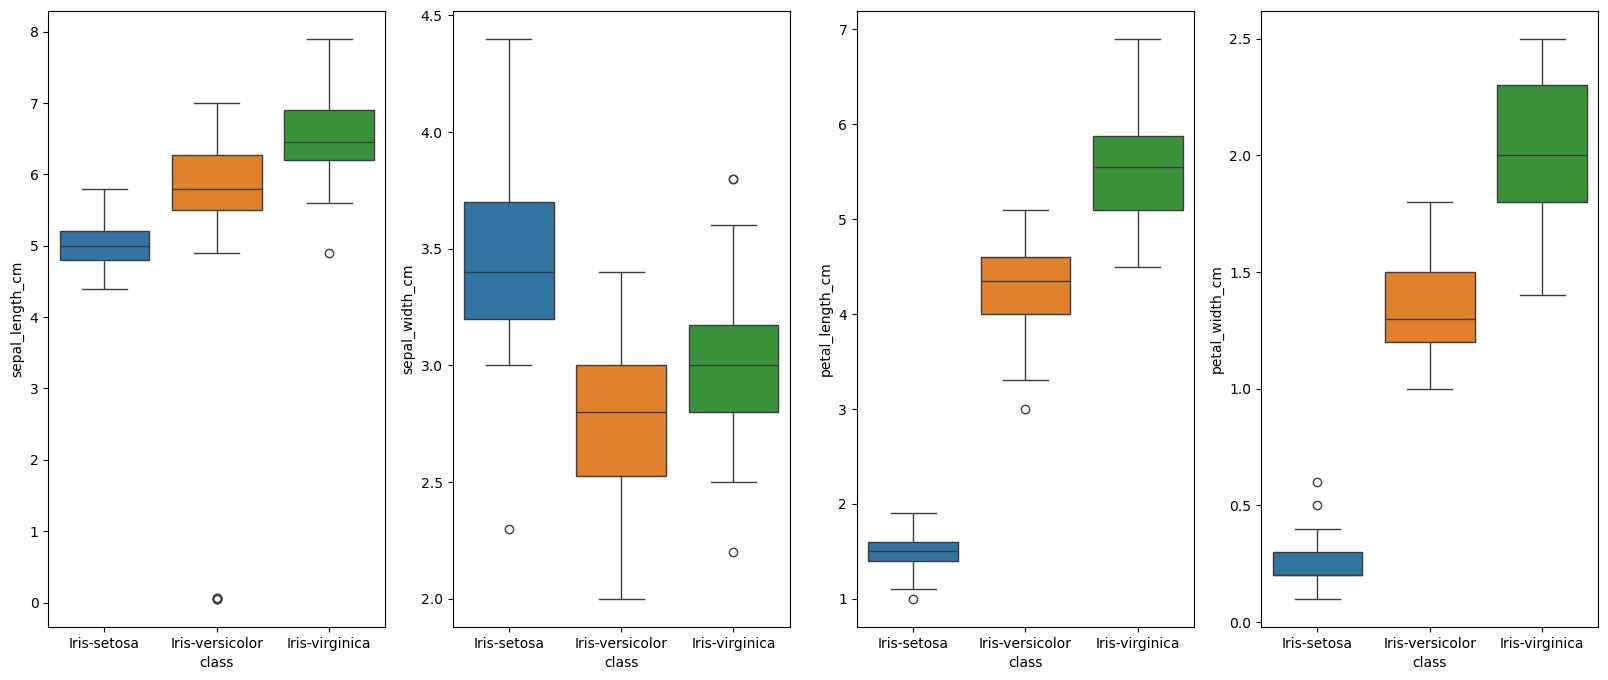

In [72]:
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
sns.boxplot(x = 'class', y = 'sepal_length_cm', data = df, hue = 'class')
plt.subplot(1,4,2)
sns.boxplot(x = 'class', y = 'sepal_width_cm', data = df, hue = 'class')
plt.subplot(1,4,3)
sns.boxplot(x = 'class', y = 'petal_length_cm', data = df, hue = 'class')
plt.subplot(1,4,4)
sns.boxplot(x = 'class', y = 'petal_width_cm', data = df, hue = 'class')


In [73]:
final_df = df[df['class'] != 'Iris-virginica']
final_df['class'].value_counts()

class
Iris-versicolor    50
Iris-setosa        45
Name: count, dtype: int64

/home/soumya/miniconda3/envs/ml_pclub_roadmap/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


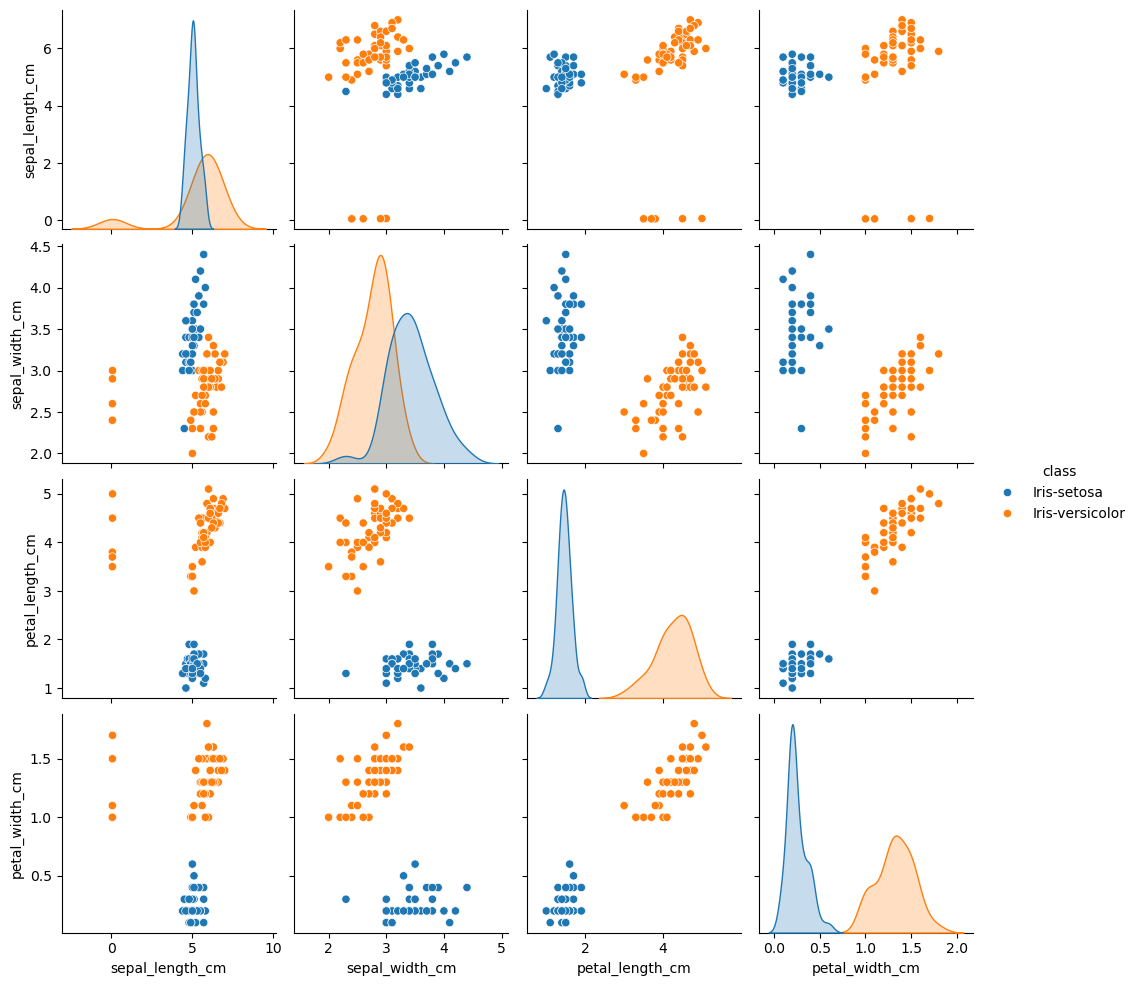

In [74]:
sns.pairplot(final_df, hue = 'class', size = 2.5)

<Axes: xlabel='sepal_length_cm', ylabel='Count'>

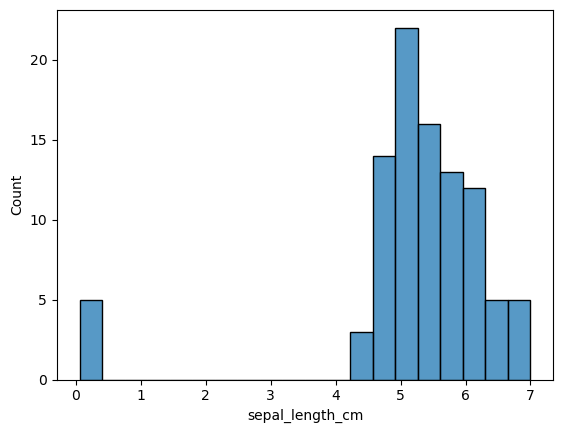

In [75]:
sns.histplot(final_df['sepal_length_cm'], bins = 20)

array([[<Axes: title={'center': 'sepal_length_cm'}>]], dtype=object)

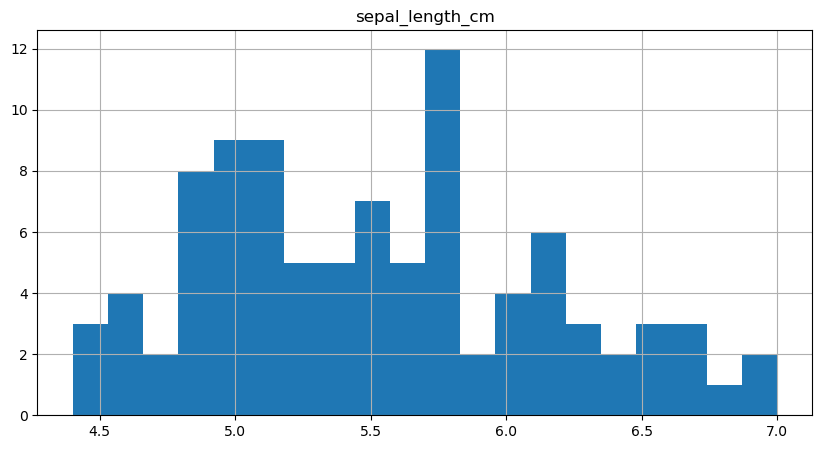

In [76]:
final_df.loc[final_df.sepal_length_cm<1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm', bins = 20, figsize = (10,5))

<Axes: xlabel='sepal_width_cm', ylabel='Count'>

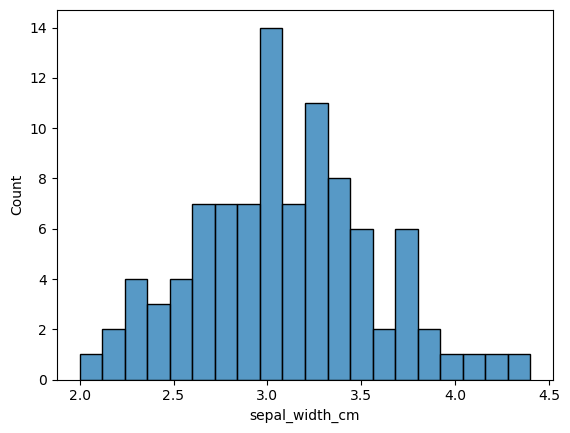

In [77]:
sns.histplot(final_df['sepal_width_cm'], bins = 20)

array([[<Axes: title={'center': 'sepal_width_cm'}>]], dtype=object)

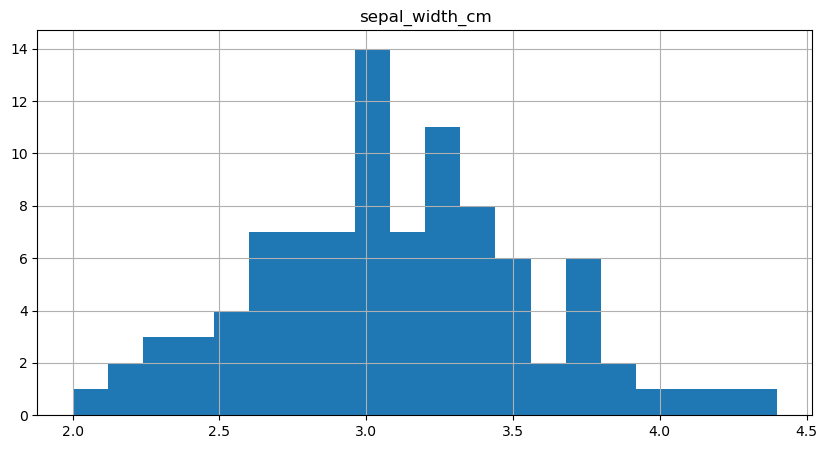

In [78]:
final_df = final_df.drop(final_df[(final_df['class'] == 'Iris-setosa') & (final_df['sepal_width_cm'] < 2.5)].index)
final_df.hist(column = 'sepal_width_cm', bins = 20, figsize = (10,5))

/home/soumya/miniconda3/envs/ml_pclub_roadmap/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


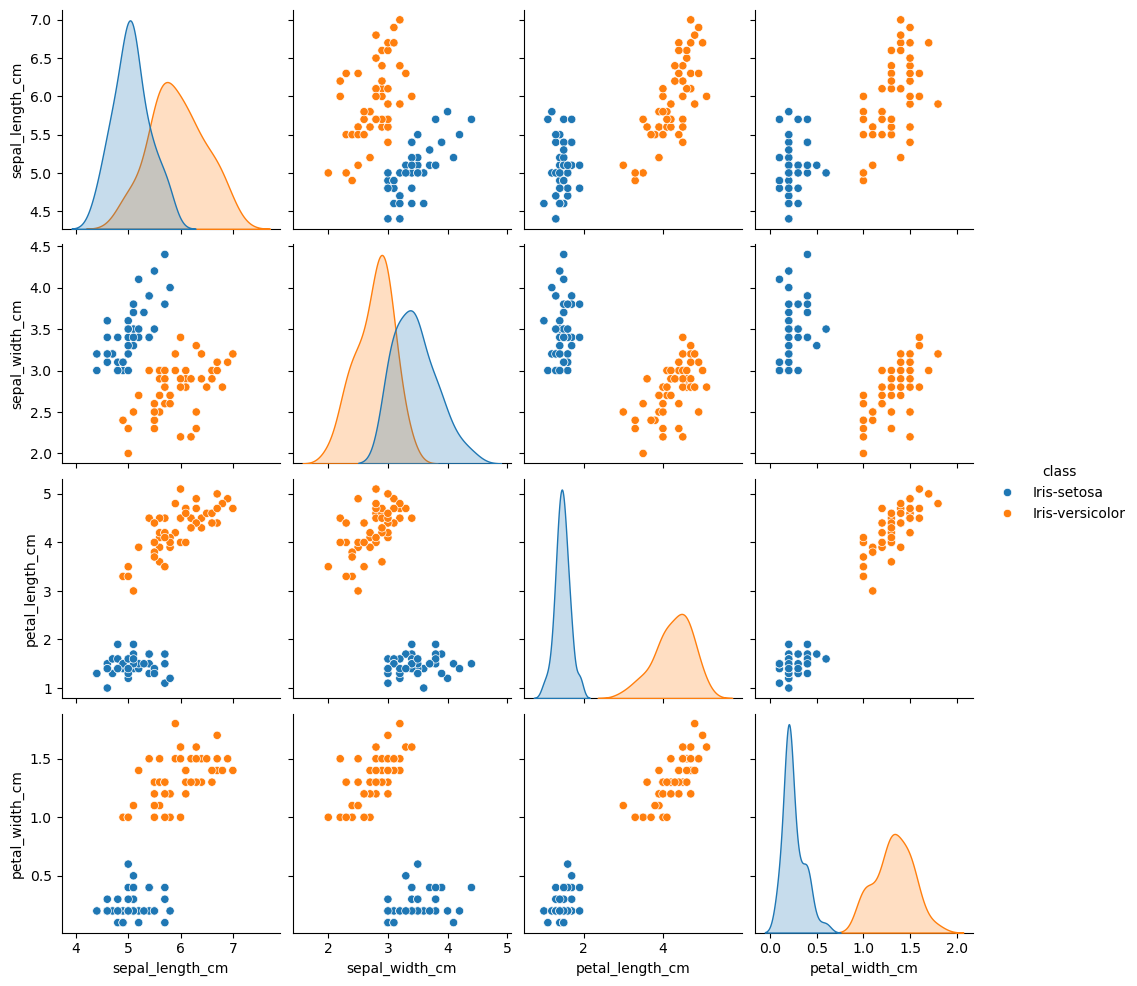

In [79]:
sns.pairplot(final_df, hue = 'class', size = 2.5)

In [80]:
final_df['class'] = final_df['class'].replace(['Iris-setosa','Iris-versicolor'], [0,1])
final_df['class'].value_counts()

/tmp/ipykernel_1005/4116026477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['class'] = final_df['class'].replace(['Iris-setosa','Iris-versicolor'], [0,1])


class
1    50
0    44
Name: count, dtype: int64

In [81]:
inp_df = final_df.drop(final_df.columns[[4]], axis = 1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis = 1)

scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size = 0.2, random_state = 42)


In [85]:
print(X_train.shape)
print(y_train.shape)

(75, 4)
(75, 1)


In [86]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0 
    return w,b 

In [88]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [89]:
def model_optimize(w,b,X,Y):
    m = X.shape[0]
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    